* [Постановка задачи](#task)
    * [Загрузка данных](#load_data)
    * [Приведение типов](#cast)
    * [Обзор данных](#review)    
    * [Обработка пропусков](#gaps)
    * [Обработка выбросов](#outliers)
    * [Построение новых признаков](#new_features)
    * [Сохранение обучающего датасета](#saving)
* [Статистическая обработка](#stat_processing)
    * [Анализ целевой переменной](#target_analysis)

### Постановка задачи<a class="anchor" id="task"></a>

Требуется на основании демографических данных о клиентах банка, истории их платежей и состоянии счета, предсказать невыполнение их обязательств по кредитной карте в следующем месяце.

**Описание датасета**

* **LIMIT_BAL** - Сумма предоставленного кредита
* **SEX** - Пол (1=мужчина, 2=женщина)
* **EDUCATION** - Образование (1=аспирантура, 2=университет, 3=старшая школа, 4=прочее, 5=неизвестно, 6=неизвестно)
* **MARRIAGE** - Семейное положение (1=женат/замужен, 2=не женат/не замуженм, 3=прочее)
* **AGE** - Возраст (в годах)
* **PAY_1** - Статус погашения в Сентябре (-1=погашен полностью, 0=погашен частично, 1=отсрочка платежа на один месяц, .., 3=отсрочка платежа на три месяца и более)
* **PAY_2** - Статус погашения в Августе
* **PAY_3** - Статус погашения в Июле
* **PAY_4** - Статус погашения в Июне
* **PAY_5** - Статус погашения в Мае
* **PAY_6** - Статус погашения в Апреле
* **BILL_AMT1** - Сумма выписки по счету в Сентябре
* **BILL_AMT2** - Сумма выписки по счету в Августе
* **BILL_AMT3** - Сумма выписки по счету в Июле
* **BILL_AMT4** - Сумма выписки по счету в Июне
* **BILL_AMT5** - Сумма выписки по счету в Мае
* **BILL_AMT6** - Сумма выписки по счету в Апреле
* **PAY_AMT1** - Сумма предыдущего платежа в Сентябре
* **PAY_AMT2** - Сумма предыдущего платежа в Августе
* **PAY_AMT3** - Сумма предыдущего платежа в Июле
* **PAY_AMT4** - Сумма предыдущего платежа в Июне
* **PAY_AMT5** - Сумма предыдущего платежа в Мае
* **PAY_AMT6** - Сумма предыдущего платежа в Апреле
* **NEXT_MONTH_DEFAULT** - Просрочка платежа в следующем месяце (1=да, 0=нет)

- - - 

#### Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

#### Пути к данным

In [3]:
# input
DATASET_PATH = 'training_project_data.csv'

# output
PREP_DATASET_PATH = 'training_project_data_prep.csv'

### Загрузка данных<a class="anchor" id="load_data"></a>

In [4]:
df = pd.read_csv(DATASET_PATH)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
0,150000.0,2,2,2,24,1,2,0,0,0,...,17853.0,34527.0,28277.0,0.0,2145.0,10000.0,22000.0,3000.0,5093.0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,30748.0,30162.0,30016.0,0.0,0.0,0.0,0.0,3100.0,798.0,1
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,6784.0,6923.0,14116.0,0.0,0.0,6784.0,159.0,167.0,760.0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,55182.0,48983.0,50136.0,3500.0,2000.0,20000.0,2000.0,2000.0,2000.0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,47026.0,45971.0,47573.0,0.0,6500.0,1800.0,0.0,2500.0,2000.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           10000 non-null  float64
 1   SEX                 10000 non-null  int64  
 2   EDUCATION           10000 non-null  int64  
 3   MARRIAGE            10000 non-null  int64  
 4   AGE                 10000 non-null  int64  
 5   PAY_1               10000 non-null  int64  
 6   PAY_2               10000 non-null  int64  
 7   PAY_3               10000 non-null  int64  
 8   PAY_4               10000 non-null  int64  
 9   PAY_5               10000 non-null  int64  
 10  PAY_6               10000 non-null  int64  
 11  BILL_AMT1           10000 non-null  float64
 12  BILL_AMT2           10000 non-null  float64
 13  BILL_AMT3           10000 non-null  float64
 14  BILL_AMT4           10000 non-null  float64
 15  BILL_AMT5           10000 non-null  float64
 16  BILL_

### Приведение типов<a class="anchor" id="cast"></a>

In [6]:
for colname in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    df[colname] = df[colname].astype(str)

In [7]:
df.dtypes

LIMIT_BAL             float64
SEX                    object
EDUCATION              object
MARRIAGE               object
AGE                     int64
PAY_1                  object
PAY_2                  object
PAY_3                  object
PAY_4                  object
PAY_5                  object
PAY_6                  object
BILL_AMT1             float64
BILL_AMT2             float64
BILL_AMT3             float64
BILL_AMT4             float64
BILL_AMT5             float64
BILL_AMT6             float64
PAY_AMT1              float64
PAY_AMT2              float64
PAY_AMT3              float64
PAY_AMT4              float64
PAY_AMT5              float64
PAY_AMT6              float64
NEXT_MONTH_DEFAULT      int64
dtype: object

### Обзор данных<a class="anchor" id="review"></a>

**Обзор целевой переменной**

In [8]:
df['NEXT_MONTH_DEFAULT'].value_counts()

0    7805
1    2195
Name: NEXT_MONTH_DEFAULT, dtype: int64

**Обзор количественных признаков**

In [9]:
df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,168182.000000,35.39600,51490.560500,49298.972000,47292.40850,43605.665800,40347.829700,38996.784300,5511.82970,5.931217e+03,5385.050600,4585.585700,4712.134300,5055.019400,0.219500
std,130118.668771,9.19536,74906.094564,71808.952137,69398.13263,65062.788893,61044.676044,59682.999879,14748.85889,2.204220e+04,18527.041096,14066.147593,14080.847065,17359.210922,0.413929
min,10000.000000,21.00000,-11545.000000,-24704.000000,-157264.00000,-65167.000000,-23003.000000,-339603.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.00000,3388.000000,3016.500000,2561.75000,2400.000000,1703.250000,1300.750000,1000.00000,7.492500e+02,390.000000,277.250000,300.000000,150.750000,0.000000
50%,140000.000000,34.00000,22896.500000,21576.000000,20370.50000,19194.000000,18261.000000,17338.000000,2163.50000,2.001000e+03,1800.000000,1500.000000,1543.000000,1500.000000,0.000000
75%,240000.000000,41.00000,67834.750000,64243.500000,60783.25000,55731.250000,50491.000000,49696.000000,5001.00000,5.000000e+03,4651.500000,4014.250000,4100.000000,4000.000000,0.000000
max,1000000.000000,75.00000,964511.000000,983931.000000,689643.00000,891586.000000,927171.000000,961664.000000,493358.00000,1.227082e+06,896040.000000,432130.000000,417990.000000,422000.000000,1.000000


**Обзор номинативных признаков**

In [10]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

SEX

2    6068
1    3932
Name: SEX, dtype: int64
****************************************************************************************************

EDUCATION

2    4678
1    3496
3    1674
5      90
4      42
6      18
0       2
Name: EDUCATION, dtype: int64
****************************************************************************************************

MARRIAGE

2    5332
1    4547
3     108
0      13
Name: MARRIAGE, dtype: int64
****************************************************************************************************

PAY_1

0     4895
-1    2852
1     1217
2      881
3      155
Name: PAY_1, dtype: int64
****************************************************************************************************

PAY_2

0     5178
-1    3318
2     1318
3      175
1       11
Name: PAY_2, dtype: int64
****************************************************************************************************

PAY_3

0     5200
-1    3379
2     1288
3      131
1        2
Name: PAY_3, 

### Обработка пропусков<a class="anchor" id="gaps"></a>

In [11]:
len(df) - df.count()

LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
AGE                   0
PAY_1                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
BILL_AMT1             0
BILL_AMT2             0
BILL_AMT3             0
BILL_AMT4             0
BILL_AMT5             0
BILL_AMT6             0
PAY_AMT1              0
PAY_AMT2              0
PAY_AMT3              0
PAY_AMT4              0
PAY_AMT5              0
PAY_AMT6              0
NEXT_MONTH_DEFAULT    0
dtype: int64

### Обработка выбросов<a class="anchor" id="outliers"></a>

**EDUCATION**

In [12]:
df['EDUCATION'].value_counts()

2    4678
1    3496
3    1674
5      90
4      42
6      18
0       2
Name: EDUCATION, dtype: int64

На основании описания считаем '0' за значение 'не известно' - соотвественно заполняем позицией '5'

In [13]:
df.loc[df['EDUCATION'] == '0', 'EDUCATION'] = '5'

In [14]:
df['EDUCATION'].value_counts()

2    4678
1    3496
3    1674
5      92
4      42
6      18
Name: EDUCATION, dtype: int64

**MARRIAGE**

In [15]:
df['MARRIAGE'].value_counts()

2    5332
1    4547
3     108
0      13
Name: MARRIAGE, dtype: int64

Значение '0' не определено, заполняем модой

In [16]:
df.loc[df['MARRIAGE'] == '0', 'MARRIAGE'] = df['MARRIAGE'].mode()[0]

In [17]:
df['MARRIAGE'].value_counts()

2    5345
1    4547
3     108
Name: MARRIAGE, dtype: int64

### Построение новых признаков<a class="anchor" id="new_features"></a>

**Id**

In [18]:
df['ID'] = df.index.tolist()

**Dummies**

In [19]:
df['IS_MALE'] = df['SEX'].map({'1':'1', '2':'0'}).astype(int)

In [20]:
for cat_colname in df.select_dtypes(include='object').columns[1:]:
    df = pd.concat([df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 62 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           10000 non-null  float64
 1   SEX                 10000 non-null  object 
 2   EDUCATION           10000 non-null  object 
 3   MARRIAGE            10000 non-null  object 
 4   AGE                 10000 non-null  int64  
 5   PAY_1               10000 non-null  object 
 6   PAY_2               10000 non-null  object 
 7   PAY_3               10000 non-null  object 
 8   PAY_4               10000 non-null  object 
 9   PAY_5               10000 non-null  object 
 10  PAY_6               10000 non-null  object 
 11  BILL_AMT1           10000 non-null  float64
 12  BILL_AMT2           10000 non-null  float64
 13  BILL_AMT3           10000 non-null  float64
 14  BILL_AMT4           10000 non-null  float64
 15  BILL_AMT5           10000 non-null  float64
 16  BILL_

### Сохранение обучающего датасета<a class="anchor" id="saving"></a>

In [22]:
df.to_csv(PREP_DATASET_PATH, index=False, encoding='utf-8')

## Статистическая обработка<a class="anchor" id="stat_processing"></a>

In [23]:
df_base = pd.read_csv(DATASET_PATH)
df = pd.read_csv(PREP_DATASET_PATH)

**Выделение целевой переменной и групп признаков**

In [24]:
TARGET_NAME = 'NEXT_MONTH_DEFAULT'
BASE_FEATURE_NAMES = df_base.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

### Анализ целевой переменной<a class="anchor" id="target_analysis"></a>

**Обзор распределения**

In [25]:
df[TARGET_NAME].value_counts()

0    7805
1    2195
Name: NEXT_MONTH_DEFAULT, dtype: int64

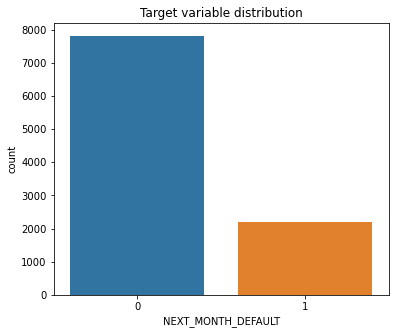

In [26]:
plt.figure(figsize=(6, 5))

sns.countplot(x=TARGET_NAME, data=df)

plt.title('Target variable distribution')
plt.show()

**Корреляция с базовыми признаками**

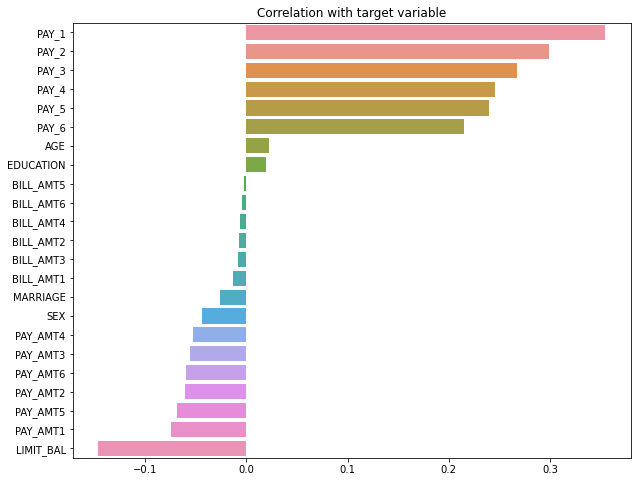

In [27]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Оценка признака "PAY_1" в разрезе целевой переменной**

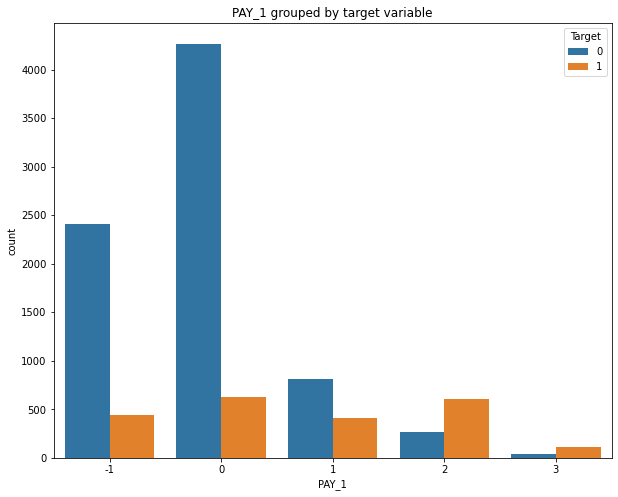

In [30]:
plt.figure(figsize=(10, 8))

sns.countplot(x='PAY_1', hue=TARGET_NAME, data=df)
plt.title('PAY_1 grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

**Наблюдение**

Изучив получившийся график, видно, что значения -1 (погашен полностью) и 0 (погашен частично) признака PAY_1 имеют схожие доли в разрезе целевой переменной. Если это действительно так, то можно будет, например, объединить их в одну категорию.

**Гипотеза** 

* Нулевая гипотеза: ожидаемые и наблюдаемые частоты согласованы
* Альтернативная гипотеза: отклонения в частотах выходят за рамки случайных колебаний, расхождения статистически значимы
* Критерий: Хи-квадрат Пирсона
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо подать наблюдаемые частоты пары категорий, например первая пара \[-1, 0\] признака PAY_1 в выбранный критерий, после чего оценить значение достигаемого уровня значимости p-value и сравнить с его с выбранным порогом альфа, если p-value получится больше выбранного порога, то гипотезу о согласованности частот можно не отбрасывать.

Проверим нашу гипотезу используя критерий Хи-квадрат Пирсона

Если p-value получилось больше выбранного уровня значимости = 0.05, соответственно у нас нет оснований для отвержения нулевой гипотезы и можно допустить, что пара категорий одинаково влияет на целевую переменную и их можно объединить в одну категорию.

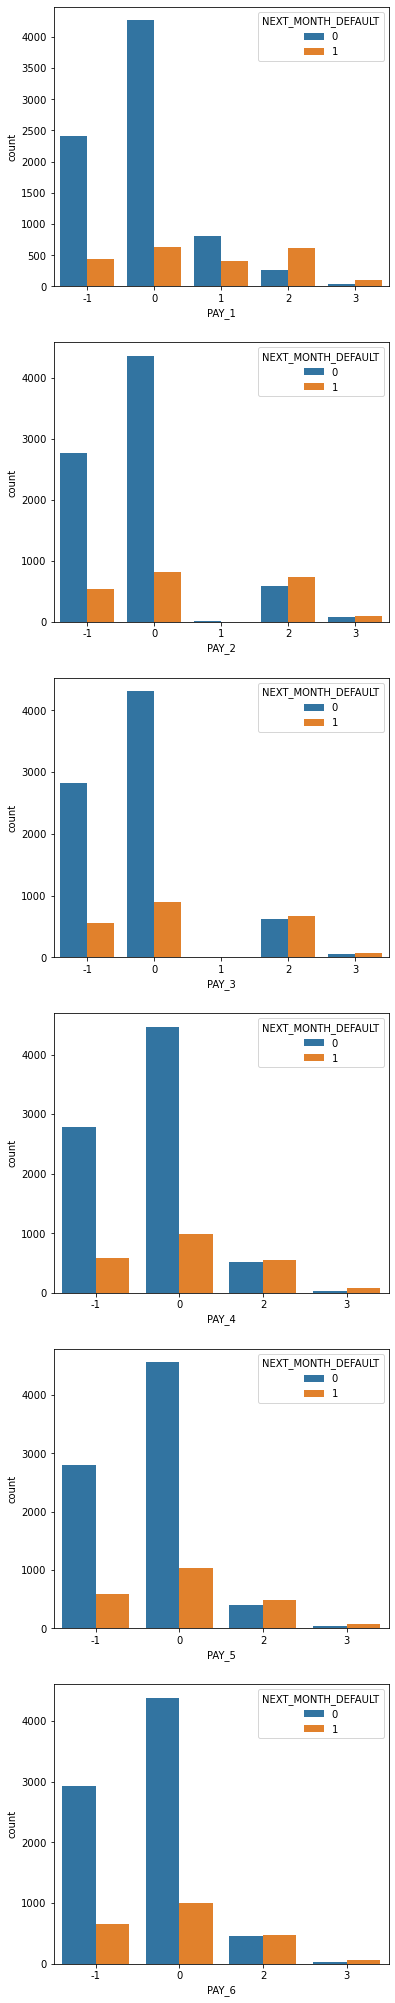

In [107]:
pays = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
fig, axs = plt.subplots(nrows=len(pays))
s_x = 6
fig.set_figheight(s_x*len(pays))
fig.set_figwidth(s_x)
for n, feature in enumerate(pays):
    sns.countplot(x=feature, hue=TARGET_NAME, data=df, ax=axs[n])
plt.show()

In [108]:
pays = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for feature in pays:
    print('\033[1m' + feature + '\033[0m')
    for i in np.arange(0, len(df[feature].unique())-1):
        pair = np.sort(df[feature].unique())[i:i+2]
        pay1_i_and_target_s = df.loc[df[feature].isin(pair), ['ID', feature, 'NEXT_MONTH_DEFAULT']].sample(1000)
        table = pay1_i_and_target_s.pivot_table(values='ID', index=feature, columns='NEXT_MONTH_DEFAULT', aggfunc='count')
        chi2, p, dof, expected = chi2_contingency(table, correction=False)
        print(f'Пара {pair}, \tp-value: {p:2.4f}, concate: {p>0.05}')

PAY_1
Пара [-1  0], 	p-value: 0.2836, concate: True
Пара [0 1], 	p-value: 0.0000, concate: False
Пара [1 2], 	p-value: 0.0000, concate: False
Пара [2 3], 	p-value: 0.4894, concate: True
PAY_2
Пара [-1  0], 	p-value: 0.8069, concate: True
Пара [0 1], 	p-value: nan, concate: False
Пара [1 2], 	p-value: 0.0186, concate: False
Пара [2 3], 	p-value: 0.6772, concate: True
PAY_3
Пара [-1  0], 	p-value: 0.7826, concate: True
Пара [0 1], 	p-value: nan, concate: False
Пара [1 2], 	p-value: nan, concate: False
Пара [2 3], 	p-value: 0.0106, concate: False
PAY_4
Пара [-1  0], 	p-value: 0.4341, concate: True
Пара [0 2], 	p-value: 0.0000, concate: False
Пара [2 3], 	p-value: 0.0084, concate: False
PAY_5
Пара [-1  0], 	p-value: 0.8669, concate: True
Пара [0 2], 	p-value: 0.0000, concate: False
Пара [2 3], 	p-value: 0.0584, concate: True
PAY_6
Пара [-1  0], 	p-value: 0.9443, concate: True
Пара [0 2], 	p-value: 0.0000, concate: False
Пара [2 3], 	p-value: 0.0047, concate: False


**Оценка признака "LIMIT_BAL" в разрезе целевой переменной**

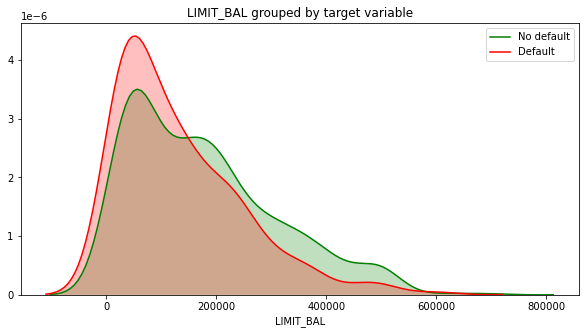

In [110]:
limit_bal_with_target_s = df[['LIMIT_BAL', TARGET_NAME]].sample(1000)
limit_bal_s = limit_bal_with_target_s['LIMIT_BAL']
limit_bal_target_0 = limit_bal_s[limit_bal_with_target_s[TARGET_NAME] == 0]
limit_bal_target_1 = limit_bal_s[limit_bal_with_target_s[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(limit_bal_target_0, shade=True, label='No default', color='g')
sns.kdeplot(limit_bal_target_1, shade=True, label='Default', color='r')

plt.xlabel('LIMIT_BAL')
plt.title('LIMIT_BAL grouped by target variable')
plt.show()

**Наблюдение**

Похоже что две группы, полученные в результате разбиения признака "LIMIT_BAL" по целевой переменной, имеют различные распределения, что может помочь при построение модели, т.к. это будет означать, что между признаком "LIMIT_BAL" и целевой переменной, возможно, существует некоторая функциональная зависимость.

**Гипотеза** 
* Нулевая гипотеза: средние значения в двух независимых выборках равны
* Альтернативная гипотеза: средние значения в двух независимых выборках различаются
* Критерий: критерий Стьюдента (t-тест) и его аналоги
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Что бы проверить данную гипотезу сравним две выборки из рассматриваемых групп на предмет равенства средних значений.
Если вероятность того, что мат. ожидания в исходных группах равны, при данных выборках, буде менее 5%, то можно будет говорить о том, что скорее всего выборки имеют различные распределения.

**Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка**

In [116]:
p_val = shapiro(limit_bal_s)[1]
print(f'p-value: {p_val:3.4f} \nраспределение нормальное: {p_val > 0.05}')

p-value: 0.0000 
распределение нормальное: False


Ввиду того, что закон распределения отличный от "нормального", в связи с чем, мы не сможем воспользоваться критерием Стьюдента для проверки гипотезы о равности мат. ожиданий признака LIMIT_BAL в группах с просроченным и непросроченным платежом в следующем месяце, но мы сможем воспользоваться его непараметрическим аналогом - критерием Манна-Уитни, который не требователен к закону распределения.

In [117]:
mannwhitneyu(limit_bal_target_0, limit_bal_target_1)

MannwhitneyuResult(statistic=68854.0, pvalue=2.6632817507569007e-06)

Согласно значению p-value, гипотеза о равности мат. ожиданий отвергается, но стоит ради дополнительной проверки обратиться к доверительным интервалам.

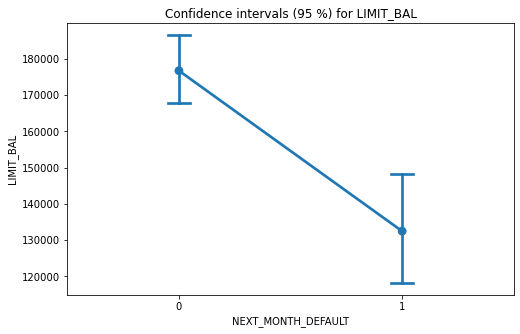

In [118]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='LIMIT_BAL', data=limit_bal_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for LIMIT_BAL')
plt.show()

**Оценка признака "PAY_AMT1" в разрезе целевой переменной**

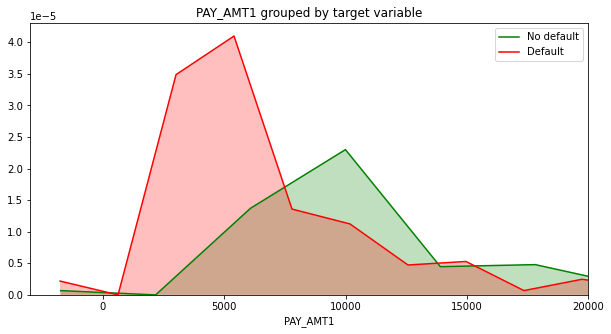

In [211]:
PAY_AMT='PAY_AMT1'

# PAY_AMT_with_target_s = df[[PAY_AMT, TARGET_NAME]].sample(1000)
PAY_AMT_with_target_s = df[[PAY_AMT, TARGET_NAME]]
PAY_AMT_s = PAY_AMT_with_target_s[PAY_AMT]
PAY_AMT_0 = PAY_AMT_s[PAY_AMT_with_target_s[TARGET_NAME] == 0]
PAY_AMT_1 = PAY_AMT_s[PAY_AMT_with_target_s[TARGET_NAME] == 1]
plt.figure(figsize=(10, 5))

sns.kdeplot(PAY_AMT_0, shade=True, label='No default', color='g')
sns.kdeplot(PAY_AMT_1, shade=True, label='Default', color='r')

plt.xlabel('PAY_AMT1')
plt.title('PAY_AMT1 grouped by target variable')
plt.xlim(-3e3, 2e4)
plt.show()

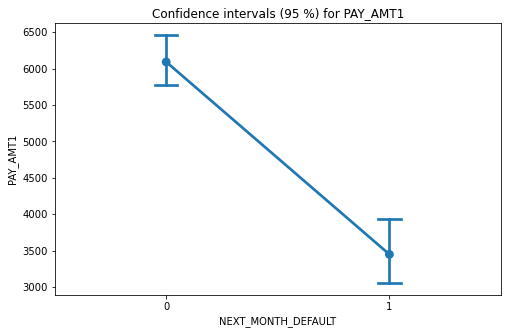

In [213]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='PAY_AMT1', data=PAY_AMT_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for PAY_AMT1')
plt.show()

In [200]:
mannwhitneyu(PAY_AMT_0, PAY_AMT_1)

MannwhitneyuResult(statistic=6601793.0, pvalue=2.3900778322520622e-61)

**Оценка признака "PAY_AMT2" в разрезе целевой переменной**

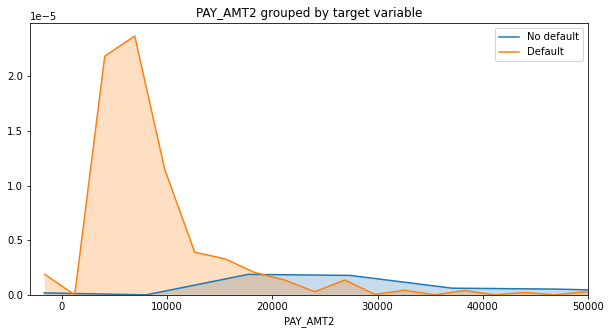

In [217]:
PAY_AMT='PAY_AMT2'

# PAY_AMT_with_target_s = df[[PAY_AMT, TARGET_NAME]].sample(1000)
PAY_AMT_with_target_s = df[[PAY_AMT, TARGET_NAME]]
PAY_AMT_s = PAY_AMT_with_target_s[PAY_AMT]
PAY_AMT_0 = PAY_AMT_s[PAY_AMT_with_target_s[TARGET_NAME] == 0]
PAY_AMT_1 = PAY_AMT_s[PAY_AMT_with_target_s[TARGET_NAME] == 1]
plt.figure(figsize=(10, 5))

sns.kdeplot(PAY_AMT_0, shade=True, label='No default')
sns.kdeplot(PAY_AMT_1, shade=True, label='Default')

plt.xlabel(PAY_AMT)
plt.title(PAY_AMT + ' grouped by target variable')
plt.xlim(-3e3, 5e4)
plt.show()

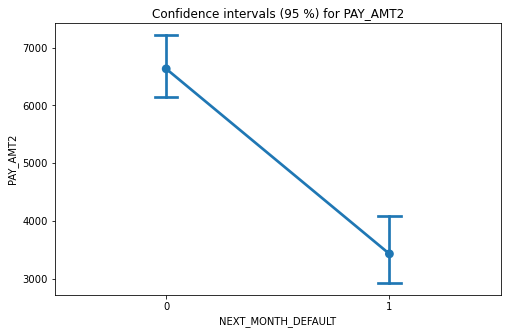

In [215]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y=PAY_AMT, data=PAY_AMT_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for ' + PAY_AMT)
plt.show()

In [218]:
mannwhitneyu(PAY_AMT_0, PAY_AMT_1)

MannwhitneyuResult(statistic=6676723.5, pvalue=5.74838811250637e-57)

**Оценка признака "PAY_AMT3" в разрезе целевой переменной**

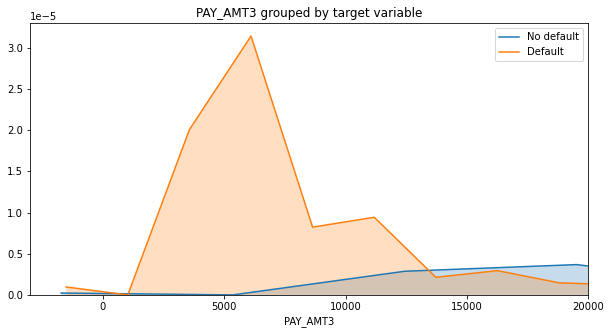

In [219]:
PAY_AMT='PAY_AMT3'

PAY_AMT_with_target_s = df[[PAY_AMT, TARGET_NAME]]
PAY_AMT_s = PAY_AMT_with_target_s[PAY_AMT]
PAY_AMT_0 = PAY_AMT_s[PAY_AMT_with_target_s[TARGET_NAME] == 0]
PAY_AMT_1 = PAY_AMT_s[PAY_AMT_with_target_s[TARGET_NAME] == 1]
plt.figure(figsize=(10, 5))

sns.kdeplot(PAY_AMT_0, shade=True, label='No default')
sns.kdeplot(PAY_AMT_1, shade=True, label='Default')

plt.xlabel(PAY_AMT)
plt.title(PAY_AMT + ' grouped by target variable')
plt.xlim(-3e3, 2e4)
plt.show()

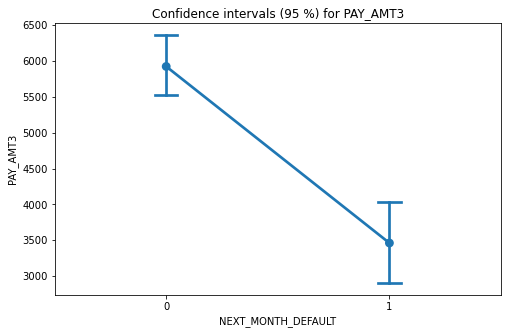

In [220]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y=PAY_AMT, data=PAY_AMT_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for ' + PAY_AMT)
plt.show()

In [221]:
mannwhitneyu(PAY_AMT_0, PAY_AMT_1)

MannwhitneyuResult(statistic=6851777.0, pvalue=2.3377123868780393e-47)